<a href="https://colab.research.google.com/github/tej37/deep-neuron-network-cats-and-dog-classification/blob/main/cats_and_dogs_recognition_with_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deep neuron network from scratch


In [ ]:
!pip install --user dnn_utils

ERROR: Could not find a version that satisfies the requirement dnn_utils (from versions: none)
ERROR: No matching distribution found for dnn_utils


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward

ModuleNotFoundError: No module named 'dnn_utils'

In [ ]:
def relu(Z):
    """
    Compute the ReLU of Z

    Arguments:
    Z -- A scalar or numpy array of any size.

    Return:
    A -- ReLU(Z)
    cache -- Z, stored for computing the backward pass efficiently
    """
    A = np.maximum(0, Z)
     # Cache the input value, which is needed for the backward pass
    return A

In [ ]:
def sigmoid(z):
  """
  This function calculates the sigmoid of an array of input values.

  Args:
    x: The input array.

  Returns:
    The sigmoid of each element in x.
  """
  return 1 / (1 + np.exp(-z))

# Example usage
#X = np.array([0, 0.5, 1.0])
#y = sigmoid(X)
#print(y)  # Output: [ 0.52499995  0.62275225  0.73105858]


In [ ]:
def log_loss(y_true, y_pred):
  """
  This function calculates the log loss between true labels and predicted probabilities.

  Args:
    y_true: The true labels, as a numpy array of 0s and 1s.
    y_pred: The predicted probabilities, as a numpy array between 0 and 1.

  Returns:
    The log loss value.
  """
  # Clip y_pred to avoid log(0) errors
  y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

  # Calculate log loss
  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  #loss= 1/len(y_true) * np.sum(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 -y_pred))
  return loss

# Example usage
#y_true = np.array([1, 0, 1])
#y_pred = np.array([0.8, 0.2, 0.7])
#loss = log_loss(y_true, y_pred)
#print(loss)  # Output: 0.20273296178714374


In [ ]:
def initialisation(dimensions):

    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [ ]:
param=initialisation([2,32,30,1])
for key,val in param.items():
  print(key,val.shape)

W1 (32, 2)
b1 (32, 1)
W2 (30, 32)
b2 (30, 1)
W3 (1, 30)
b3 (1, 1)


In [ ]:
def forward_propagation(X, parametres):

  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):
    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    if ('A' + str(c) =='A'+str(C)):
     activations['A' + str(c)] = sigmoid(Z)
    else:
     activations['A' + str(c)] =np.maximum(0, Z)

  return activations

In [ ]:
activ=forward_propagation(X,param)
for key,val in activ.items():
  print(key,val.shape)

A0 (2, 100)
A1 (32, 100)
A2 (30, 100)
A3 (1, 100)


In [ ]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [ ]:
g=back_propagation(y,param,activ)
for key,val in g.items():
  print(key,val.shape)


dW3 (1, 30)
db3 (1, 1)
dW2 (30, 32)
db2 (30, 1)
dW1 (32, 2)
db1 (32, 1)


In [ ]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [ ]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [ ]:
def deep_neural_network(X, y,X_test,y_test, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):

    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    print(dimensions)
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 4))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        act_test=forward_propagation(X_test, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]
        Af_test=act_test['A' + str(C)]
        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        training_history[i, 2] = (log_loss(y_test.flatten(), Af_test.flatten()))
        y_pred = predict(X, parametres)
        y_pred_test= predict(X_test, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))
        training_history[i, 3] = (accuracy_score(y_test.flatten(), y_pred_test.flatten()))
    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.plot(training_history[:, 2], label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.plot(training_history[:, 3], label='test acc')
    plt.legend()
    plt.show()

    return training_history,parametres

dimensions de X: (2, 100)
dimensions de y: (1, 100)


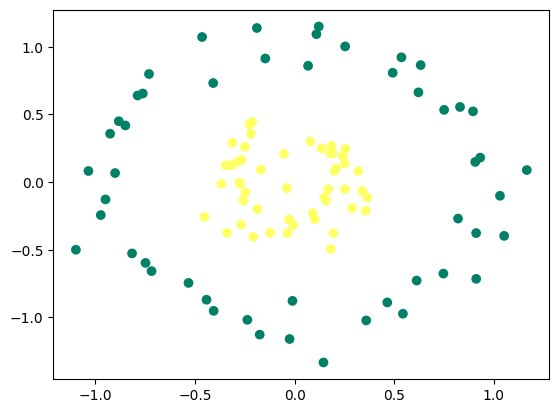

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

[2, 2, 16, 16, 1, 1]


100%|██████████| 3000/3000 [00:04<00:00, 710.00it/s]


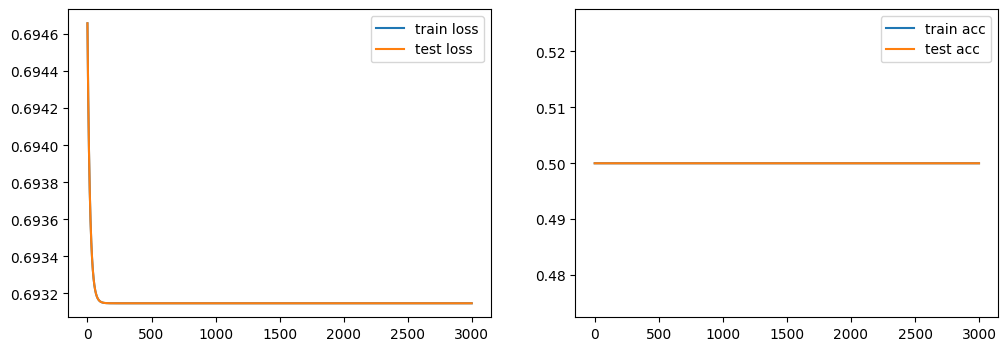

In [ ]:
h,p=deep_neural_network(X, y,X,y,hidden_layers = (2,16, 16,1), learning_rate = 0.1, n_iter = 3000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import os
from PIL import Image

%matplotlib inline

In [ ]:
def load_dataset(folder_path):
    def load_images_and_labels(subfolder_name):
        subfolder_path = os.path.join(folder_path, subfolder_name)
        images = []
        labels = []

        for filename in os.listdir(subfolder_path):
            if filename.endswith('.jpg'):  # Adjust the file extension based on your dataset
                label = int(filename.startswith('1'))
                labels.append(label)

                image_path = os.path.join(subfolder_path, filename)
                image = Image.open(image_path)
                image_array = np.asarray(image)
                images.append(image_array)

        return np.array(images), np.array(labels)

    train_set_x_orig, train_set_y = load_images_and_labels('train')
    test_set_x_orig, test_set_y = load_images_and_labels('test')

    # Reshape the label arrays to shape (1, number_of_examples)


    classes = np.array(['not cat', 'cat'])

    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes




In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset("/content/drive/MyDrive/Data")

y = [1], it's a 'cat' picture.


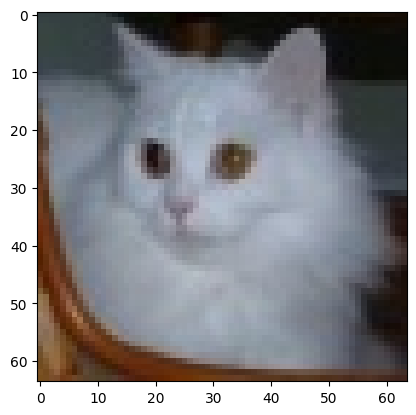

In [ ]:
index = 23
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])] + "' picture.")

In [ ]:
print(train_set_x_orig)
x=train_set_x_orig/255
print(x[0])
print(x.shape)

In [ ]:
### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 838)
train_set_y shape: (1, 838)
test_set_x_flatten shape: (12288, 369)
test_set_y shape: (1, 369)
sanity check after reshaping: [149 143 121 149 143]


In [ ]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [ ]:
train_set_x=train_set_x.T
test_set_x=test_set_x.T


In [ ]:
print(train_set_x.shape)
print(test_set_x.shape)

(838, 12288)
(369, 12288)


In [ ]:
print(train_set_y.shape)
print(train_set_x.shape)

(1, 838)
(12288, 838)


In [ ]:
train_set_y= train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y= test_set_y.reshape((1,test_set_y.shape[0]))

ValueError: cannot reshape array of size 838 into shape (1,1)

[12288, 20, 10, 10, 1]


  0%|          | 2/1000 [00:00<03:00,  5.52it/s]<ipython-input-10-b607c5b0419a>:13: RuntimeWarning: invalid value encountered in multiply
  dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
<ipython-input-10-b607c5b0419a>:13: RuntimeWarning: overflow encountered in multiply
  dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
100%|██████████| 1000/1000 [03:17<00:00,  5.07it/s]


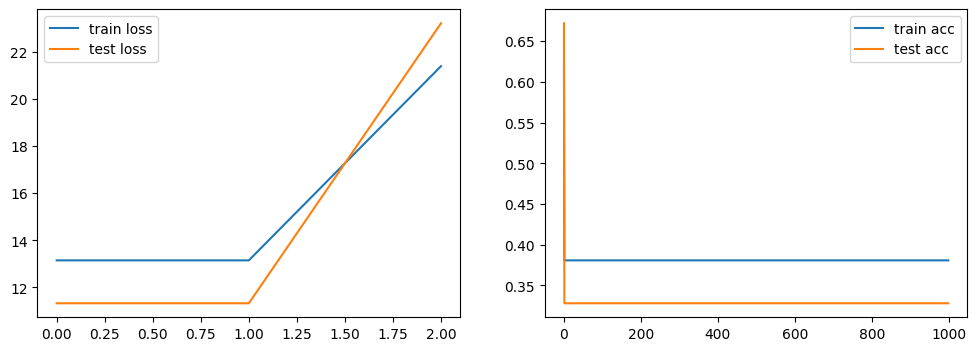

In [ ]:
h,p=deep_neural_network(train_set_x, train_set_y,test_set_x,test_set_y, hidden_layers = (20, 10, 10), learning_rate = 0.001, n_iter = 1000)

In [ ]:
print(h[499][3])

0.6720867208672087


In [ ]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 838
Number of testing examples: m_test = 369
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (838, 64, 64, 3)
train_set_y shape: (1, 838)
test_set_x shape: (369, 64, 64, 3)
test_set_y shape: (1, 369)


In [ ]:
my_image = "/content/drive/MyDrive/Data/train/0_01A8L6NM3RLG.jpg"  # change this to the name of your image file
!pip install Pillow

In [ ]:
from PIL import Image
fname = my_image
image = Image.open(fname)
image = image.resize((num_px, num_px))
image_array = np.array(image)

# Reshape and standardize the image
my_image = image_array.reshape((1, num_px * num_px * 3)).T

# Assuming predict is a function you've defined and d is a dictionary containing your model parameters
my_predicted_image = predict(my_image, p)

plt.imshow(image_array)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image))] + "\" picture.")

NameError: name 'predict' is not defined

In [ ]:
train_set_x.shape

(838, 64, 64, 3)

In [ ]:
train_set_y=train_set_y.T

In [ ]:
train_set_y.shape

(838, 1)

# tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4680 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9258


# tensorflow lel cat and dog

In [ ]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_y.shape)

(838, 64, 64, 3)
(369, 64, 64, 3)
(838,)
(369,)


In [ ]:
train_set_x_orig =train_set_x_orig / 255
test_set_x_orig =test_set_x_orig / 255

In [ ]:
X_train_flattened = train_set_x_orig.reshape(len(train_set_x_orig), 64*64*3)
X_test_flattened = test_set_x_orig.reshape(len(test_set_x_orig), 64*64*3)

In [ ]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)
print(train_set_y.shape)
print(test_set_y.shape)

(838, 12288)
(369, 12288)
(838,)
(369,)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(12288,), activation='relu'),
    keras.layers.Dense(42, activation='relu'),
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, train_set_y, epochs=20)

Epoch 1/20
27/27 [==============================] - 3s 18ms/step - loss: 0.6942 - accuracy: 0.5895
Epoch 2/20
27/27 [==============================] - 0s 16ms/step - loss: 0.6099 - accuracy: 0.6671
Epoch 3/20
27/27 [==============================] - 0s 13ms/step - loss: 0.4747 - accuracy: 0.7924
Epoch 4/20
27/27 [==============================] - 0s 13ms/step - loss: 0.4892 - accuracy: 0.7625
Epoch 5/20
27/27 [==============================] - 0s 14ms/step - loss: 0.4129 - accuracy: 0.8258
Epoch 6/20
27/27 [==============================] - 0s 13ms/step - loss: 0.4570 - accuracy: 0.7876
Epoch 7/20
27/27 [==============================] - 0s 11ms/step - loss: 0.3848 - accuracy: 0.8389
Epoch 8/20
27/27 [==============================] - 0s 7ms/step - loss: 0.3773 - accuracy: 0.8353
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.3575 - accuracy: 0.8484
Epoch 10/20
27/27 [==============================] - 0s 7ms/step - loss: 0.3394 - accuracy: 0.8461
Epoch 11/20


In [ ]:
model.evaluate(X_test_flattened, test_set_y)

12/12 [==============================] - 0s 4ms/step - loss: 0.3792 - accuracy: 0.8537


[0.3792089819908142, 0.8536585569381714]